In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import os

In [2]:
# Read the data from the local system
data = pd.read_csv("C:\DataAnalysis\Data\Mlern\diabetes.csv")
data;

In [3]:
# I want to use train_test_split evaluation method
# So I conventionally import the scikit-learn train/test split package
from sklearn.model_selection import train_test_split

In [4]:
# Check the Dataset columns
data.columns

# separate the Features and Response from the dataset and lebel them

X = data[['NoOfPregnancies', 'GlucoseLevel', 'BloodPressureLevel',
       'SkinThickness', 'HoursInsulinIn', 'BMI', 'DiabetesPedigreeFunction',
       'Age']]
y = data['RiskDiabetes']


In [13]:
# Just check the few records on top side
X.head()
y;

In [6]:
# Now I will check shape and type of features and response 

# check shape
X.shape
y.shape

# Check type
type(X)
type(y)

pandas.core.series.Series

In [7]:
# Now I will split the Dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.25)

In [8]:
#Check the train/test splited data
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(192,)

In [9]:
# Conventionally import the Decission tress package class
from sklearn.tree import DecisionTreeClassifier

In [10]:
#Create an instance of Model class
dtree = DecisionTreeClassifier()

# Fit the training data into model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
y_est = dtree.predict(X_test)

#### Check the Model Accuracy and Evaluation

In [14]:
# To measure accuracy we import metrics from scikit-learn package

from sklearn import metrics
from pandas_ml import ConfusionMatrix
labels = ['No','Yes']

In [15]:
metrics.accuracy_score(y_test,y_est)

0.71875

In [18]:
cm = ConfusionMatrix(y_test, y_est)

In [19]:
cm

Predicted  0.0  1.0  __all__
Actual                      
0.0         21   11       32
1.0         12    5       17
__all__     33   16       49

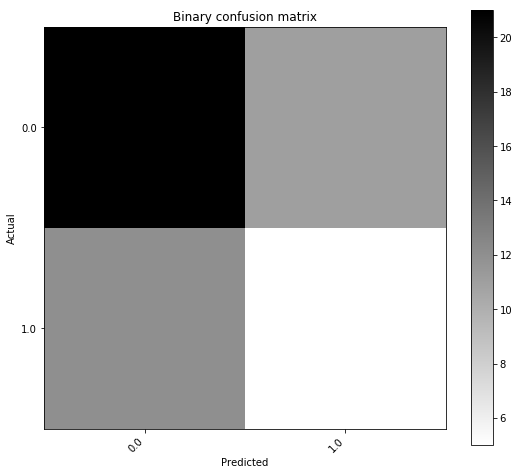

In [23]:
cm.plot()


In [27]:
# Print Overall statistics

cm.print_stats()

population: 49
P: 17
N: 32
PositiveTest: 16
NegativeTest: 33
TP: 5
TN: 21
FP: 11
FN: 12
TPR: 0.294117647059
TNR: 0.65625
PPV: 0.3125
NPV: 0.636363636364
FPR: 0.34375
FDR: 0.6875
FNR: 0.705882352941
ACC: 0.530612244898
F1_score: 0.30303030303
MCC: -0.050378745996
informedness: -0.0496323529412
markedness: -0.0511363636364
prevalence: 0.34693877551
LRP: 0.855614973262
LRN: 1.0756302521
DOR: 0.795454545455
FOR: 0.363636363636


#### 10 fold cross-validation evaluation

In [33]:
# import cross_val_score from sklearn package
from sklearn.model_selection import cross_val_score

In [41]:
y_score = cross_val_score(dtree, X,y, cv=10, scoring='accuracy').mean()

In [42]:
y_score

0.70177717019822283

#### Logistics Regression

In [49]:
# import Logistics class
from sklearn.linear_model import LogisticRegression

In [50]:
lgR = LogisticRegression()

lgR.fit(X_train,y_train)
lgr_pred = lgR.predict(X_test)

In [51]:
metrics.accuracy_score(y_test, lgr_pred)

0.8125

In [52]:
cm_lgR = ConfusionMatrix(y_test, lgr_pred)
cm_lgR

Predicted  0.0  1.0  __all__
Actual                      
0.0         21   11       32
1.0         12    5       17
__all__     33   16       49

In [53]:
cm_lgR.print_stats()

population: 49
P: 17
N: 32
PositiveTest: 16
NegativeTest: 33
TP: 5
TN: 21
FP: 11
FN: 12
TPR: 0.294117647059
TNR: 0.65625
PPV: 0.3125
NPV: 0.636363636364
FPR: 0.34375
FDR: 0.6875
FNR: 0.705882352941
ACC: 0.530612244898
F1_score: 0.30303030303
MCC: -0.050378745996
informedness: -0.0496323529412
markedness: -0.0511363636364
prevalence: 0.34693877551
LRP: 0.855614973262
LRN: 1.0756302521
DOR: 0.795454545455
FOR: 0.363636363636
